# Customer Churn Prediction

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [2]:
# Creating a dataframe for the dataset
data=pd.read_csv(r"C:\Users\Kola Karthikeya\Downloads\archive (5)\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df=pd.DataFrame(data)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Basic Details about DATASET

In [3]:
print("Number of rows:",df.shape[0])
print("Number of Columns:",df.shape[1])

Number of rows: 7043
Number of Columns: 21


In [4]:
# Getting the information about the type of the columns we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Checking the Statistics on numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Checking any null values are there in the dataset
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# Checking any Duplicates are present in the dataset
df.duplicated().sum()

0

---

## Basic Preprocessing

In [8]:
# Dropping the column which will not effect the Churn column
df.drop("customerID",axis = 1,inplace=True)

In [9]:
# Replacing the empty values with Nan
df["TotalCharges"] = np.where(df["TotalCharges"].str.strip() == '', np.nan, df["TotalCharges"])

# Converting the column datatype into float
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [10]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

df['Churn'] = df['Churn'].astype(int)

In [11]:
# Checking the information after changing the Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [12]:
# Checking the Statistics after changing the Datatype
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2266.771362,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


---

## Exploratory Data Analysis

In [13]:
# Using group by to get relation between gender and churn
grouped = df.groupby('gender')['Churn'].agg(Count='value_counts')
grouped

Count
gender Churn       
Female 0       2549
       1        939
Male   0       2625
       1        930

In [14]:
dfgc = grouped.pivot_table(values = 'Count', index = 'gender', columns = ['Churn'])
dfgc

Churn,0,1
gender,,
Female,2549,939
Male,2625,930


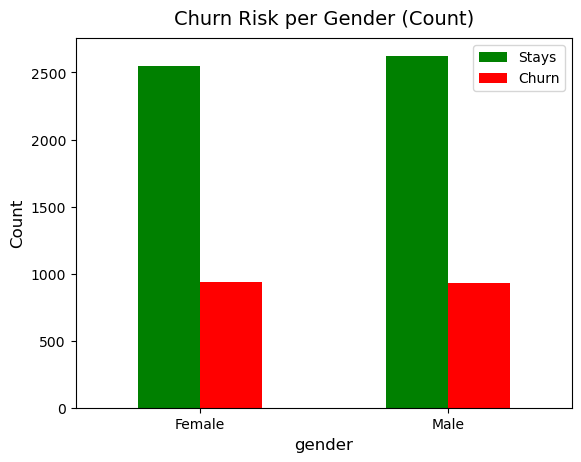

In [15]:
labels= ['Stays', 'Churn']

fig, ax1= plt.subplots()

dfgc.plot(kind='bar',
          color=['g', 'r'],
          rot=0, 
          ax=ax1)
ax1.legend(labels)
ax1.set_title('Churn Risk per Gender (Count)', fontsize=14, pad=10)
ax1.set_ylabel('Count',size=12)
ax1.set_xlabel('gender', size=12)

plt.show()

---

In [16]:
# Using group by to get relation between partner and churn
grouped = df.groupby('Partner')['Churn'].agg(Count='value_counts')
grouped

Count
Partner Churn       
No      0       2441
        1       1200
Yes     0       2733
        1        669

In [17]:
dfpc = grouped.pivot_table(values='Count', index='Partner', columns=['Churn'])
dfpc

Churn,0,1
Partner,,
No,2441,1200
Yes,2733,669


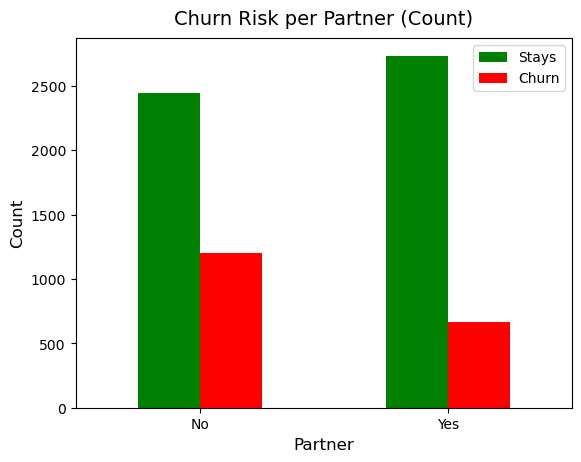

In [18]:
labels= ['Stays', 'Churn']

fig, ax1 = plt.subplots()

dfpc.plot(kind='bar',
          color=['g', 'r'],
          rot=0, 
          ax=ax1)
ax1.legend(labels)
ax1.set_title('Churn Risk per Partner (Count)', fontsize=14, pad=10)
ax1.set_ylabel('Count',size=12)
ax1.set_xlabel('Partner', size=12)

plt.show()


In [23]:
correlations = df.corr(numeric_only=True)

sort_corr_cols = correlations.Churn.sort_values(ascending=False).keys()
sort_corr = correlations.loc[sort_corr_cols,sort_corr_cols]
sort_corr

,Churn,MonthlyCharges,SeniorCitizen,TotalCharges,tenure
Churn,1.000000,0.193356,0.150889,-0.199484,-0.352229
MonthlyCharges,0.193356,1.000000,0.220173,0.651065,0.247900
SeniorCitizen,0.150889,0.220173,1.000000,0.102411,0.016567
TotalCharges,-0.199484,0.651065,0.102411,1.000000,0.825880
tenure,-0.352229,0.247900,0.016567,0.825880,1.000000


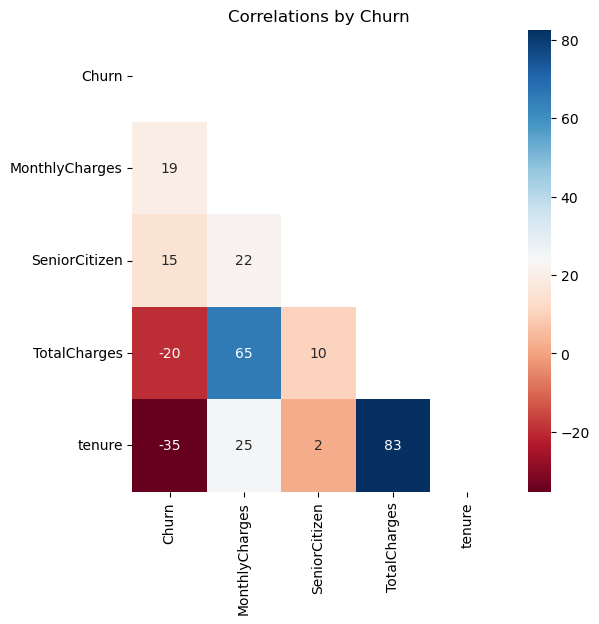

In [24]:
corr_mask = np.zeros_like(correlations)
corr_mask[np.triu_indices_from(corr_mask)] = 1

plt.figure(figsize = (6,6))

sns.heatmap(sort_corr*100,
           cmap='RdBu',
           annot=True,
           fmt='.0f',
           mask=corr_mask,
           cbar=True)

plt.title('Correlations by Churn', fontsize=12)
plt.show()

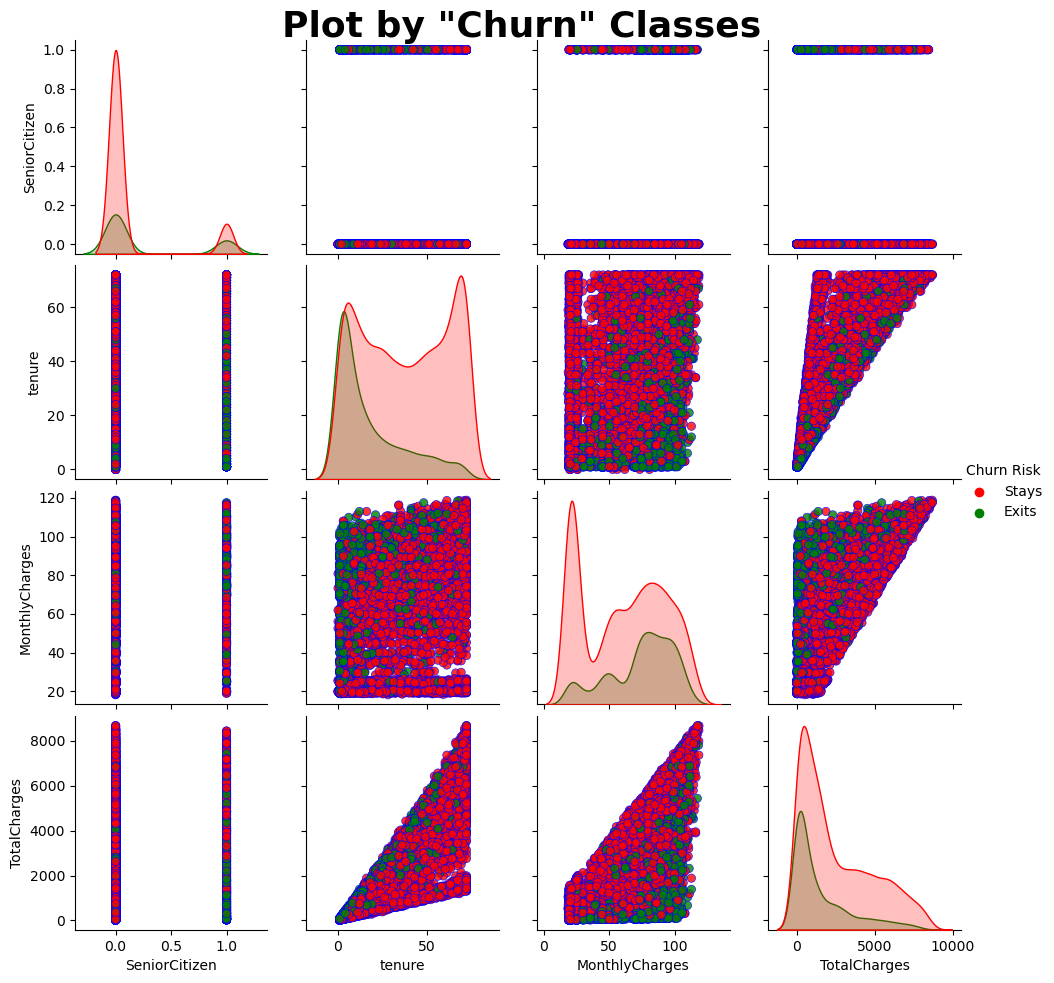

In [28]:
g = sns.pairplot(df, hue='Churn',
                 palette={1 : 'green',
                          0 : 'red'},
                 plot_kws={'alpha' : 0.8, 'edgecolor' : 'b', 'linewidth' : 0.5})

fig = g.fig
fig.subplots_adjust(top=0.95, wspace=0.2)
fig.suptitle('Plot by "Churn" Classes',
             fontsize=26,
             fontweight='bold')

new_title = 'Churn Risk'
g._legend.set_title(new_title)

new_labels = ['Stays', 'Exits']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.show()

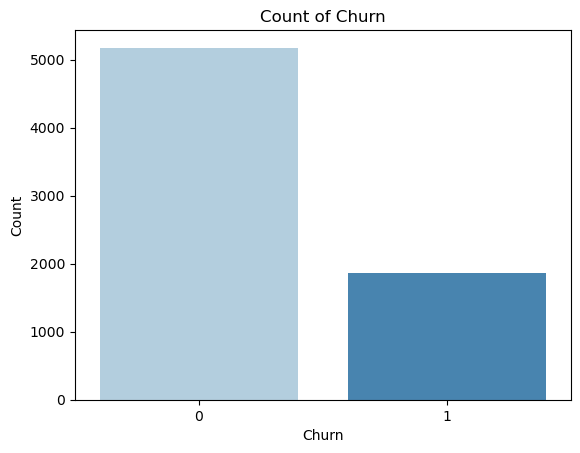

In [29]:
# Checking whether the class column ("Churn") is balanced or not
sns.countplot(data=df, x="Churn", palette="Blues")
plt.title("Count of Churn")
plt.ylabel('Count')
plt.xlabel("Churn")
plt.show()

In [30]:
# Checking the names of the columns present
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

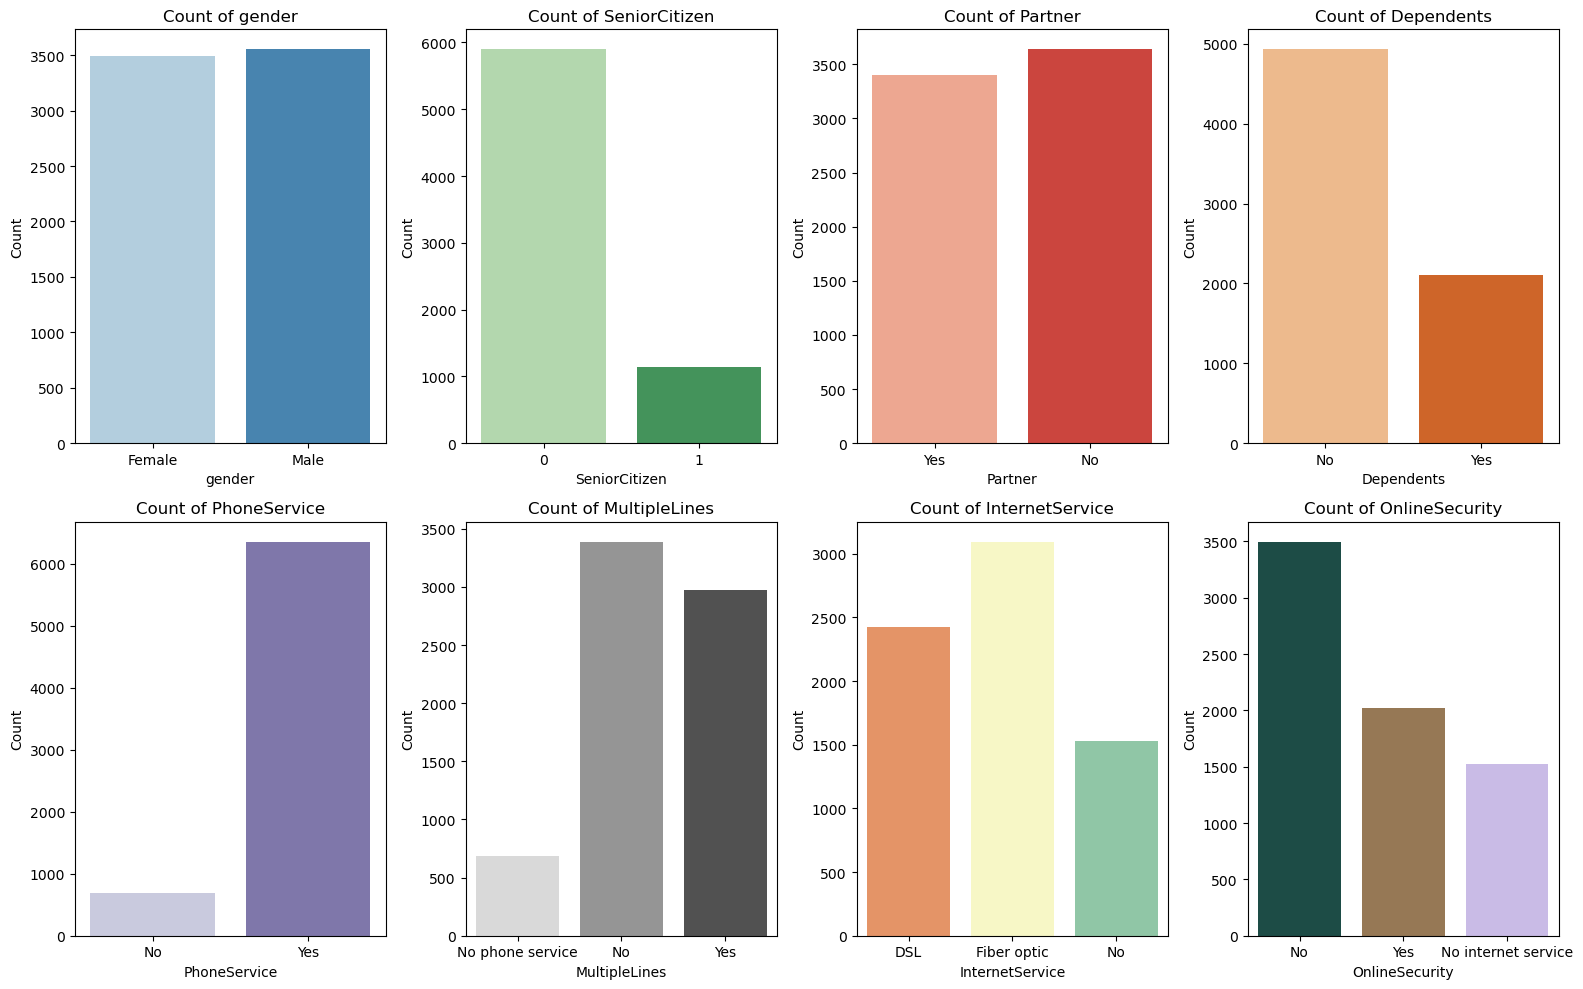

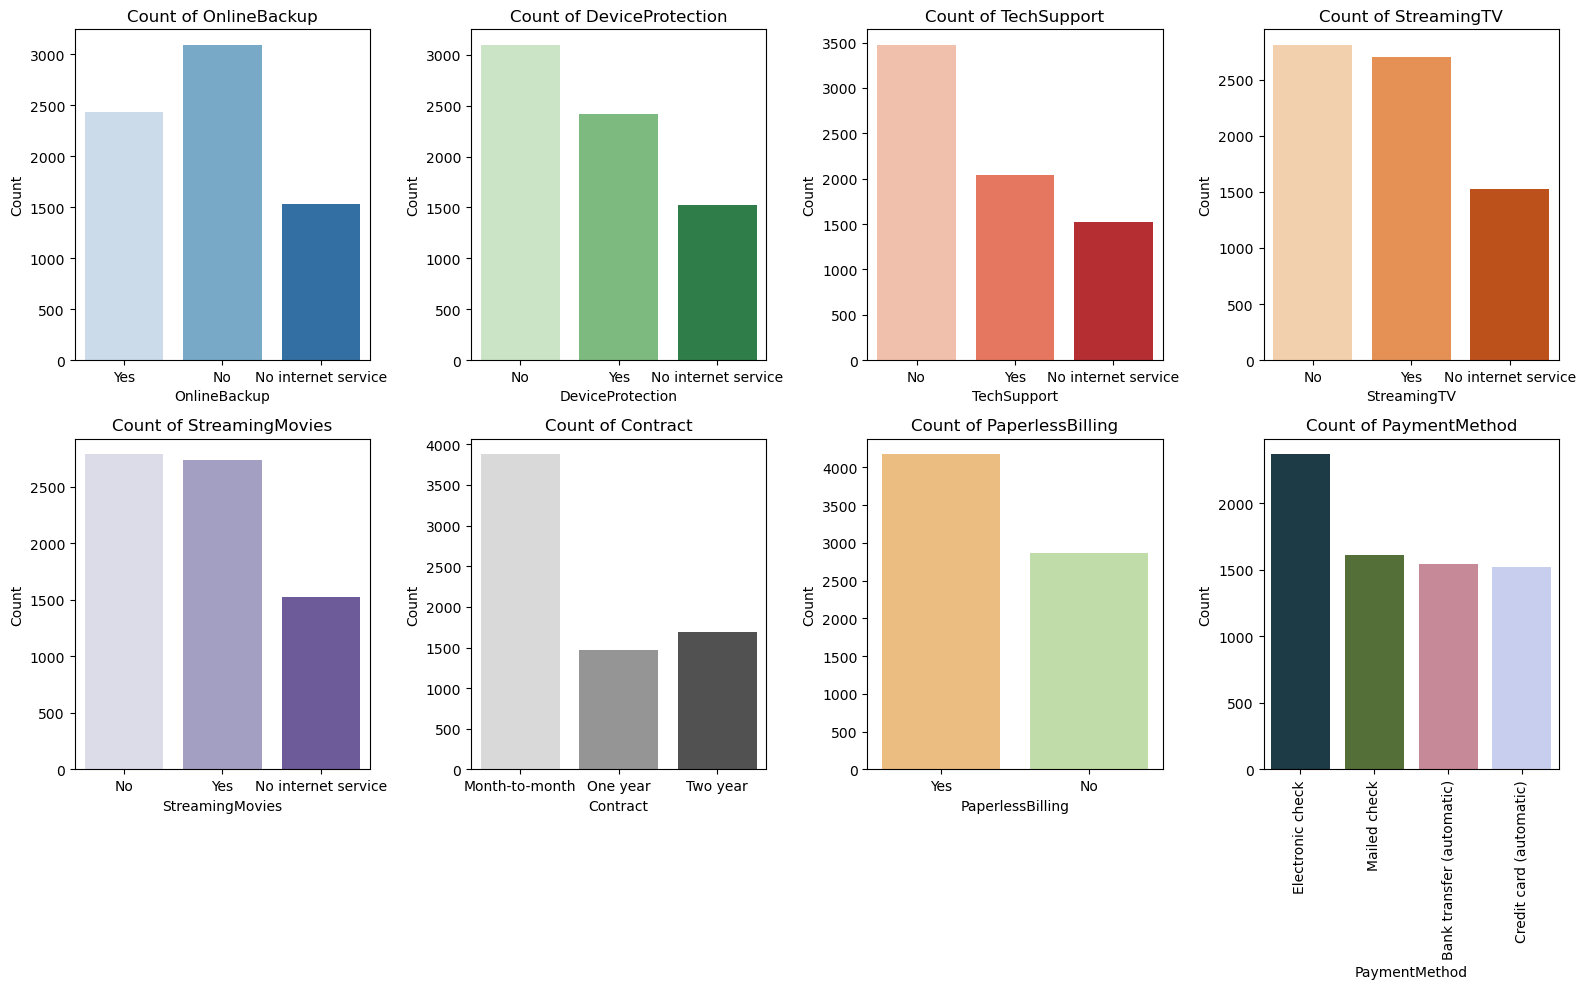

In [31]:
# Visualization of countplot with columns

columns1 = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity"]
columns2 = ["OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod"]
palettes = ["Blues", "Greens", "Reds", "Oranges", "Purples", "Greys", "Spectral", "cubehelix"]

plt.figure(figsize=(16, 10))

for i, (col, palette) in enumerate(zip(columns1, palettes), start=1):
    plt.subplot(2, 4, i)
    sns.countplot(data=df, x=col, palette=palette)
    plt.title(f"Count of {col}")
    plt.ylabel('Count')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 10))

for i, (col, palette) in enumerate(zip(columns2, palettes), start=1):
    plt.subplot(2, 4, i)
    sns.countplot(data=df, x=col, palette=palette)
    plt.title(f"Count of {col}")
    plt.ylabel('Count')
    plt.xlabel(col)
    if col == "PaymentMethod":
        plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

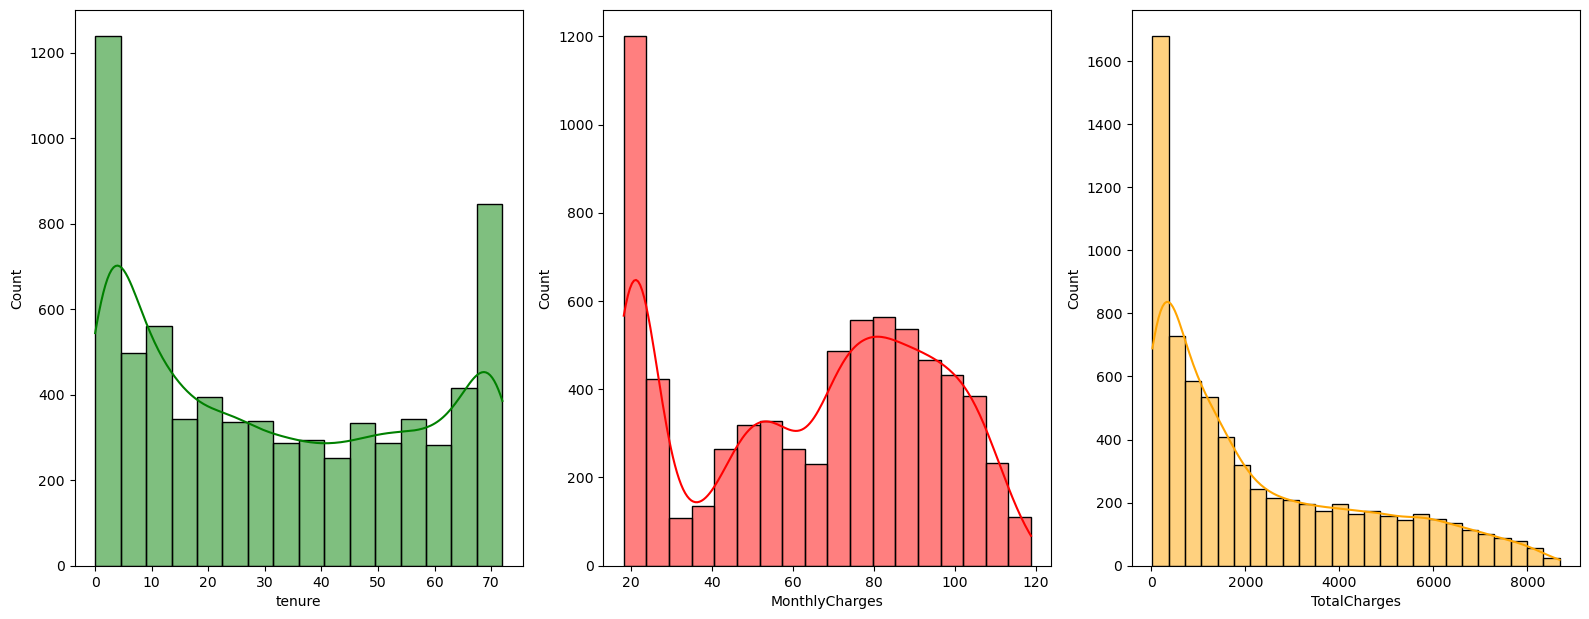

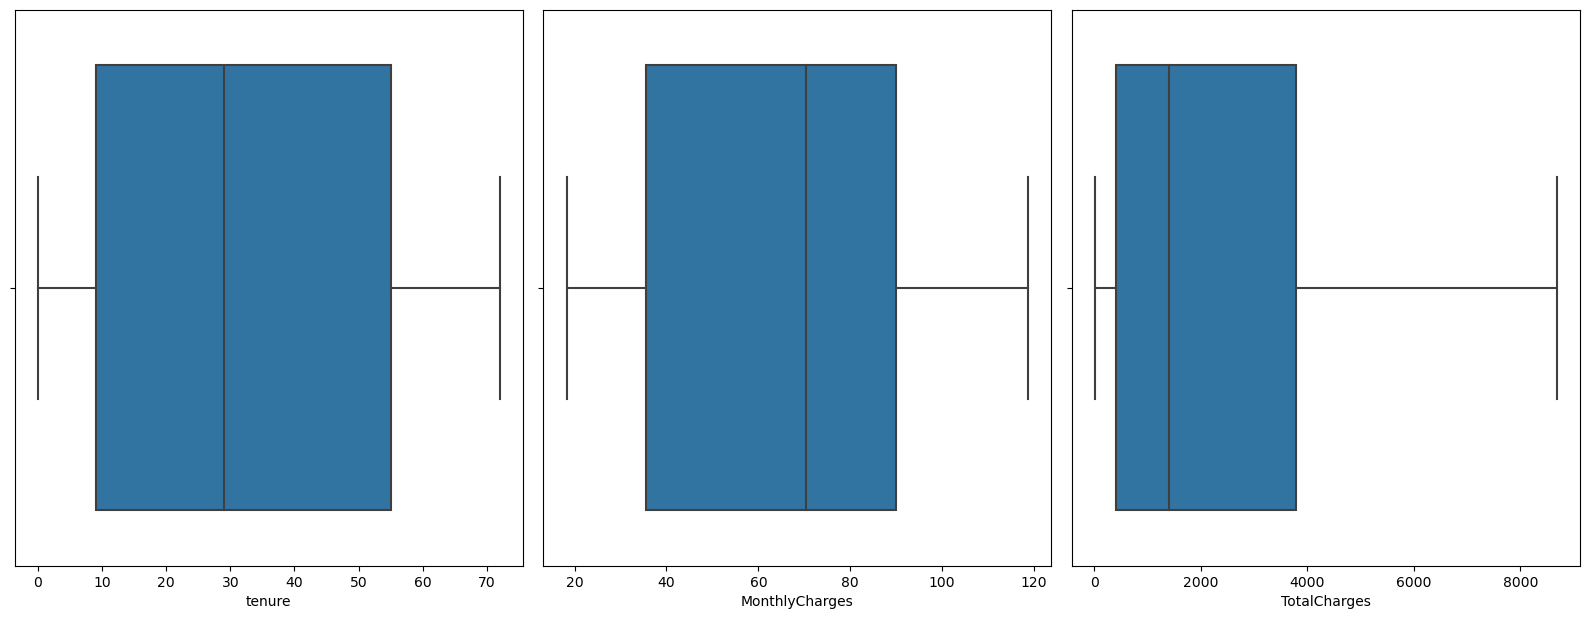

In [32]:
# Visualization of numerical columns in histplot

columns = ["tenure", "MonthlyCharges", "TotalCharges"]
colors = ["green", "red", "orange"]

plt.figure(figsize=(16, 12))
for i, (col, color) in enumerate(zip(columns, colors), start=1):
    plt.subplot(2, 3, i)
    sns.histplot(x=col, data=df, color=color, kde=True)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# Using box plot for checking the outlayers
plt.figure(figsize=(16, 12))
for i, col in enumerate(columns, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=col, data=df)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [33]:
df.to_csv(r"C:\Users\Kola Karthikeya\Desktop\Customer Churn Prediction\customer churn.csv")